In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV


Load the preprocessed data using pandas dataframe

In [2]:
data = pd.read_csv("heart_disease.csv")

# Prepare Data 
features = data.iloc[:, :13]
target = data.iloc[:,13]

# Perform Pipeline
Pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Construct Parameter Grid
params = {'pca__n_components' : [1,2,3,4,5]} 

PCs = GridSearchCV(estimator=Pipe, param_grid=params, cv=5, scoring='accuracy')
PCs.fit(features, target)

print(f"Best Number of PCs components = {PCs.best_params_['pca__n_components']}\n") # best_params_ returns a dictionary data type

Best Number of PCs components = 3



Visualize PCA results using cumulative variance plot.

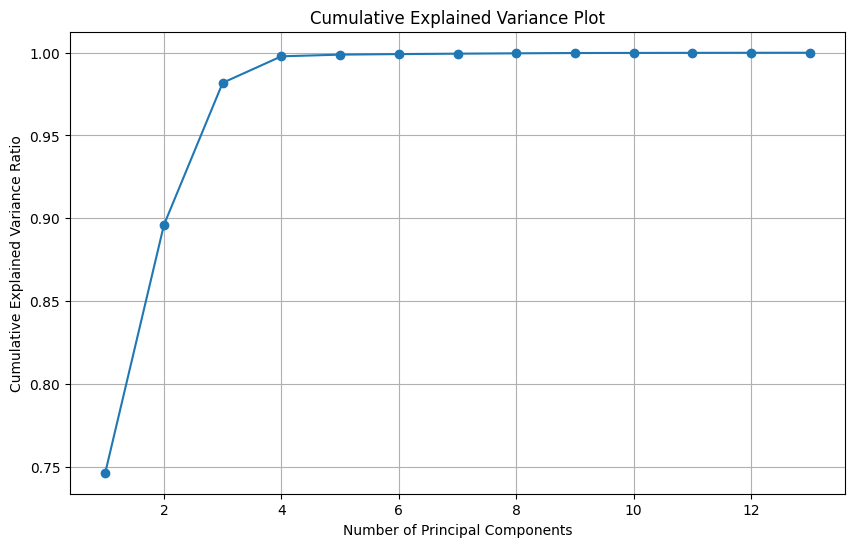

In [3]:
pca = PCA(n_components=13) ## Trying all the features
pca.fit(features)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

Using Elbow Method:
- The Curve starts to flatten (The elbow point) @ Third Princple Component 
- After the third PC the curve falttens.

Conclusions: Number of Princple Compoenets = 3 ---> Though, PC3 has lower percentage than PC1 or PC2

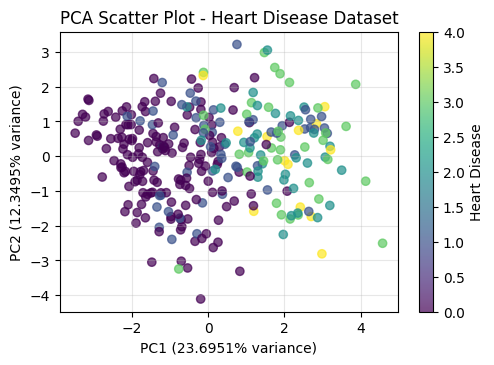

In [4]:
## Scatter Plot
pca = PCA(n_components=3, random_state=42)
features_pca = pca.fit_transform(StandardScaler().fit_transform(features))

# Create a DataFrame for easier plotting

pca_df = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2','PC3'])
pca_df['Target'] = target

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Basic scatter plot
plt.subplot(2, 2, 1)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Target'], 
                     cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Heart Disease')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.4%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.4%} variance)')
plt.title('PCA Scatter Plot - Heart Disease Dataset')
plt.grid(True, alpha=0.3)


In [5]:
pca_data = pd.DataFrame(
    features_pca,
    columns=['PC1', 'PC2','PC3']
)
pca_data['target'] = target

pca_data.to_csv('heart_disease_pca.csv', index=False)